In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv("C:\\Users\\artyo\\Downloads\\Telegram Desktop\\gym_members_exercise_tracking.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df.shape

(973, 15)

In [7]:
df.size

14595

In [8]:
df["Gender"] = df["Gender"].astype("str")
df["Gender"] = df["Gender"].str.replace("Male","Муж.")
df['Gender'] = df["Gender"].str.replace("Female","Жен.")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [9]:
pivot_table = df.groupby(['Max_BPM', 'Avg_BPM']).size().reset_index(name='count')

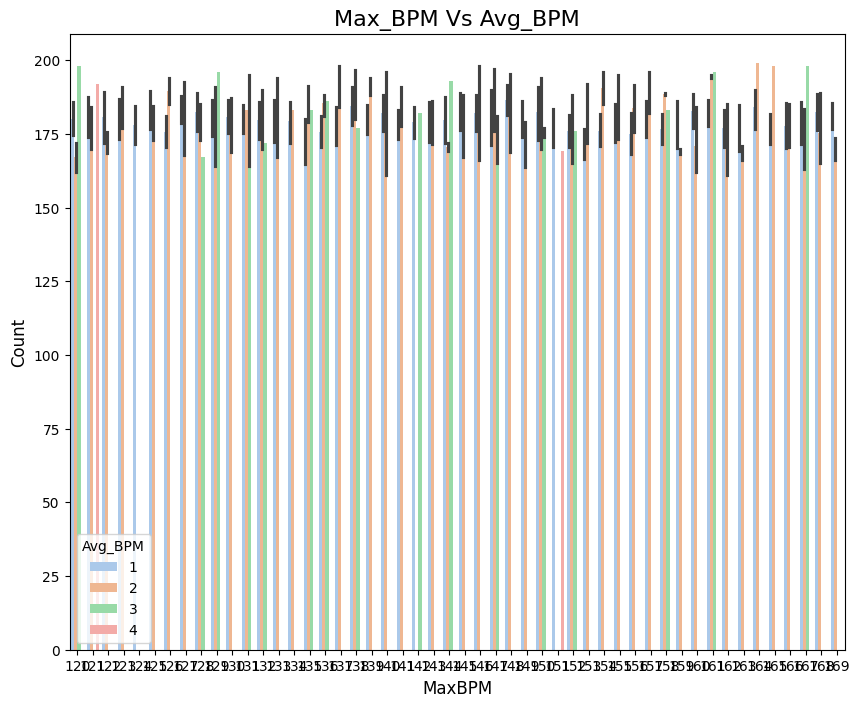

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Avg_BPM', y='Max_BPM', hue='count', data=pivot_table, palette='pastel')
plt.title('Max_BPM Vs Avg_BPM', fontsize=16)
plt.xlabel('MaxBPM', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Avg_BPM')
plt.show()

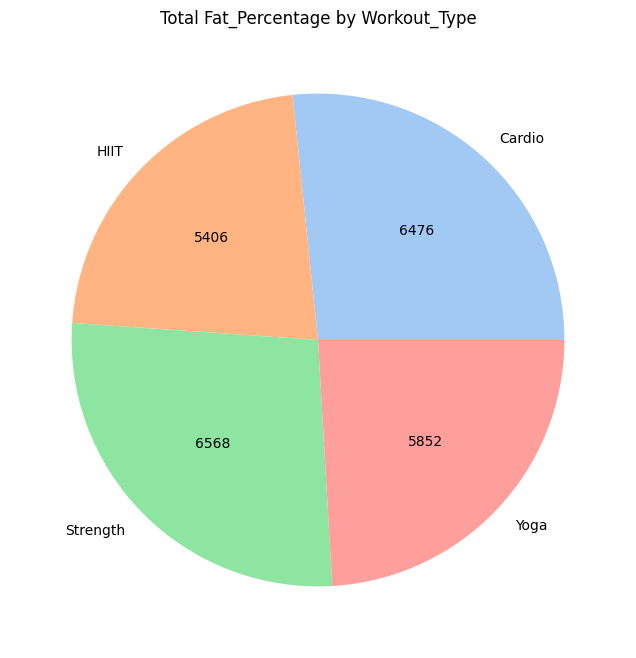

In [13]:
Workout_Type_counts = df.groupby('Workout_Type')['Fat_Percentage'].sum()
def absolute_value(val):
    total = Workout_Type_counts.sum()
    return f'{int(round(val * total / 100))}'
colors = sns.color_palette('pastel', len(Workout_Type_counts))
plt.figure(figsize=(8, 8))
plt.pie(Workout_Type_counts, labels=Workout_Type_counts.index, autopct=absolute_value, colors=colors)
plt.title('Total Fat_Percentage by Workout_Type')
plt.show()